#### Sinusoidal Model

Code to create the synthetic images for sinusoidal motion.

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_frames = 1
image_size = (512, 512)
velocity = 2.5
tracer_radius = 3
num_particles = 1
output_folder = '/Users/kavi/project_data/data_p1/v1sin1.csv'

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate particle initial positions
positions = np.random.randint(0, min(image_size), size=(num_particles, 2))

# Create synthetic images
for frame in range(num_frames):
    # Create an empty image
    image = np.zeros((*image_size, 3), dtype=np.uint8)

    # Update particle positions
    updated_positions = positions.copy()
    updated_positions[:, 0] += (velocity * np.array([frame])).astype(int)  # Fix the error by wrapping 'frame' in a NumPy array

    # Draw tracer particles on the image
    for pos in updated_positions:
        cv2.circle(image, tuple(pos), tracer_radius, (255, 255, 255), -1)

    # Save the image
    cv2.imwrite(os.path.join(output_folder, f'image_{frame:04d}.png'), image)

Comparitive Analysis for Sinusoidal motion

In [3]:
pixel_to_mm = 0.352734375

In [4]:
import pandas as pd 

# Load PIV-measured velocities from a CSV file
csv_file = 'data_p1/v2sin1.csv'
results_df = pd.read_csv(csv_file)
measured_velocities = results_df["vec"] * pixel_to_mm
time_values = results_df.index

In [5]:
# Parameters
num_frames = 100
amplitude = 20
frequency = 0.1
# time_values = np.arange(num_frames)
expected_velocities = (2 * np.pi * amplitude * frequency * np.cos(2 * np.pi * frequency * time_values)) * pixel_to_mm
mod_exp_velocities = abs(expected_velocities)

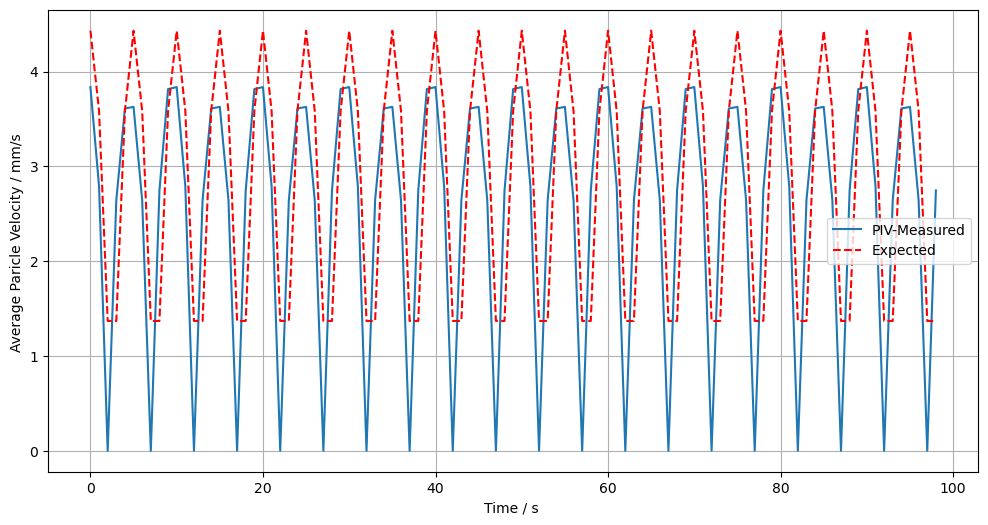

In [20]:

# Create the plot
fig_size = (12, 6)
plt.figure(figsize=fig_size)
plt.plot(time_values, measured_velocities, label='PIV-Measured')
plt.plot(time_values, mod_exp_velocities, label='Expected', linestyle='--', c="red")

plt.xlabel('Time / s ')
plt.ylabel('Average Paricle Velocity / mm/s ')
# plt.title('Measured and Expected Velocities for Sinusoidal Motion')
plt.legend()
plt.grid()

# Save the plot
plt.savefig('sinusoidal_motion_comparison.png', dpi=300)

# Show the plot
plt.show()

In [7]:
np.max(expected_velocities)

4.432590884674348

In [8]:
np.min(expected_velocities)

-4.432590884674348

In [9]:
np.min(mod_exp_velocities)

1.3697459124758329

In [10]:
np.max(measured_velocities)

3.8381194704369177

In [11]:
measured_velocities = results_df['vec'] * pixel_to_mm
measured_displacements_x = results_df['vecx'] * pixel_to_mm
measured_displacements_y = results_df['vecy'] * pixel_to_mm

cum_displacement_x = measured_displacements_x.cumsum()
cum_displacement_y = measured_displacements_y.cumsum()

# Create the expected displacement and velocity arrays
expected_displacements_x = (amplitude * np.sin(2 * np.pi * frequency * time_values)) * pixel_to_mm
expected_displacements_y = np.zeros(num_frames-1)
expected_velocities = [expected_velocities] * len(time_values)

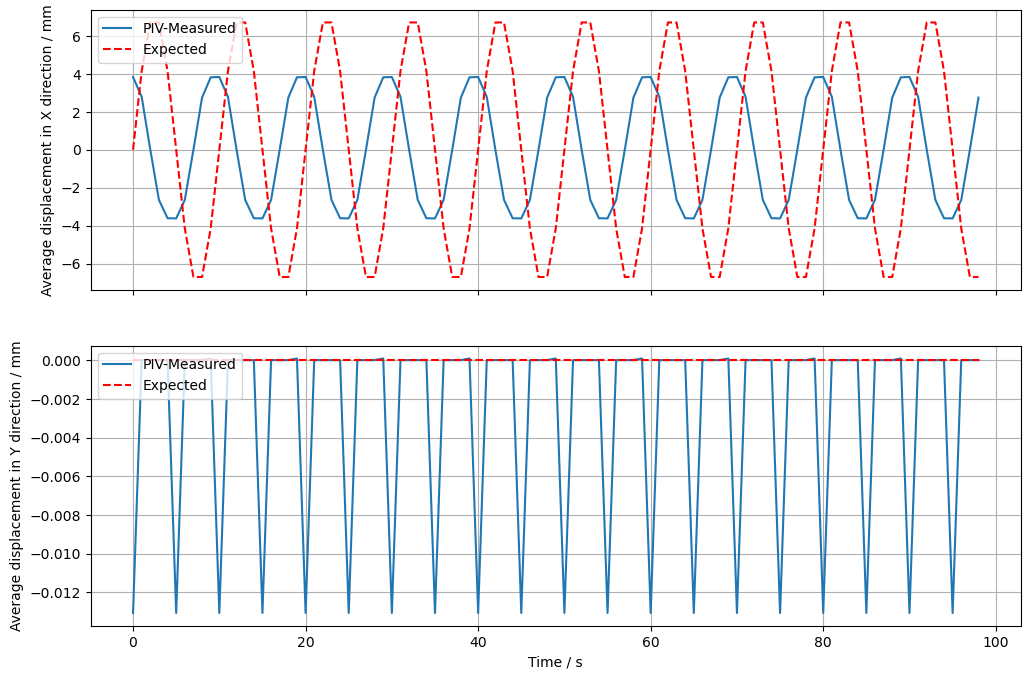

In [22]:
# Create the displacement plots
fig_size = (12, 8)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=fig_size, sharex=True)
ax1.plot(time_values, measured_displacements_x, label='PIV-Measured')
ax1.plot(time_values, expected_displacements_x, label='Expected', linestyle='--', c="red")
ax1.set(ylabel='Average displacement in X direction / mm')
ax1.legend(loc='upper left')
ax1.grid()

ax2.plot(time_values, measured_displacements_y, label='PIV-Measured')
ax2.plot(time_values, expected_displacements_y, label='Expected', linestyle='--', c="red")
ax2.set(xlabel='Time / s', ylabel='Average displacement in Y direction / mm')
ax2.legend(loc='upper left')
ax2.grid()

plt.show()

In [13]:
#Print Average Values:

print (f"Expected Velocity (mm/s): {np.mean(mod_exp_velocities)}")
print (f"Average Velocity (mm/s): {np.mean(measured_velocities)}")

Expected Velocity (mm/s): 2.8615885558609038
Average Velocity (mm/s): 2.5598008443643407


In [14]:
#Print Average Values:

print (f"Expected Velocity (mm/s): {np.std(mod_exp_velocities)}")
print (f"Average Velocity (mm/s): {np.std(measured_velocities)}")

Expected Velocity (mm/s): 1.2667192481355094
Average Velocity (mm/s): 1.3675147591317898


In [15]:
print (f"Expected Velocity (mm/frame): {np.mean(expected_displacements_x)}")
print (f"Average Velocity (mm/frame): {np.mean(measured_displacements_x)}")

Expected Velocity (mm/frame): 0.041885265374061335
Average Velocity (mm/frame): 0.02858002201367048


In [16]:
print (f"Expected Velocity (mm/frame): {np.mean(expected_displacements_y)}")
print (f"Average Velocity (mm/frame): {np.mean(measured_displacements_y)}")

Expected Velocity (mm/frame): 0.0
Average Velocity (mm/frame): -0.0026313901091721014


In [17]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(mod_exp_velocities, measured_velocities)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(mod_exp_velocities, measured_velocities)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 0.8849682811672372
Mean Squared Error (MSE): 0.9943314700242147
Root Mean Squared Error (RMSE): 0.997161707058697


In [18]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(expected_displacements_x, measured_displacements_x)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(expected_displacements_x, measured_displacements_x)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 5.804906338875401
Mean Squared Error (MSE): 42.03504896724518
Root Mean Squared Error (RMSE): 6.483444221032921


In [19]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(expected_displacements_y, measured_displacements_y)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(expected_displacements_y, measured_displacements_y)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 0.0026470891276757966
Mean Squared Error (MSE): 3.4480327291408875e-05
Root Mean Squared Error (RMSE): 0.005871995171269206
